In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# models
from sklearn.linear_model import LinearRegression # as a baseline
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator
from sklearn.impute import KNNImputer

# metrics
from sklearn.metrics import mean_absolute_error, SCORERS

/var/folders/d6/4ww_t_md77b57vhv75x05wsw0000gn/T/ipykernel_61275/3974716833.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X_train.corr()


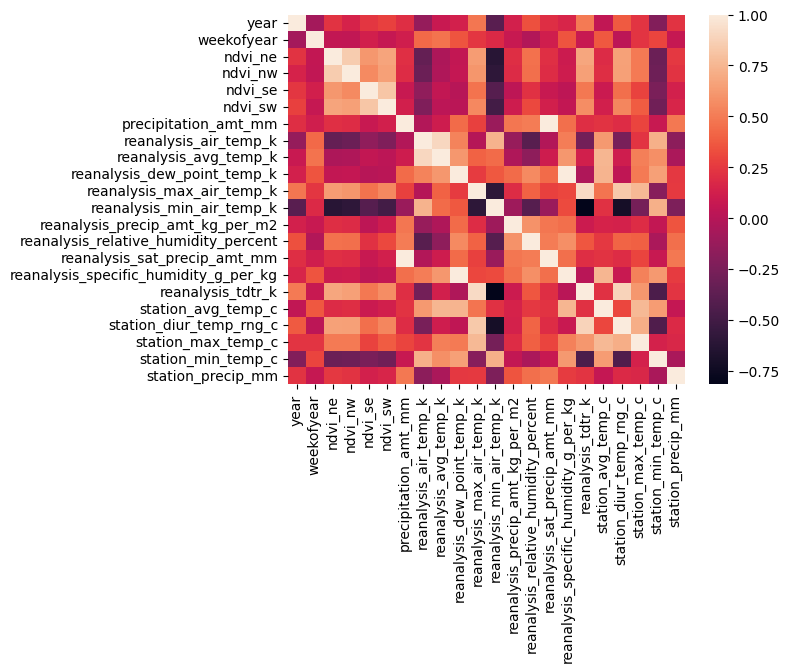

(416, 24)

In [7]:
y_train = pd.read_csv('./data/dengue_labels_train.csv')
X_train = pd.read_csv('./data/dengue_features_train.csv')
X_test = pd.read_csv('./data/dengue_features_test.csv')

# heatmap of correlation between features
corr = X_train.corr()
sns.heatmap(corr)
plt.show()
X_test.shape

In [8]:
df = pd.concat([X_train, y_train.loc[:, 'total_cases']], axis=1)
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [9]:
df['Month'] = pd.to_datetime(df.loc[:, "week_start_date"]).dt.month
df['Month']

0       4
1       5
2       5
3       5
4       5
       ..
1451    5
1452    6
1453    6
1454    6
1455    6
Name: Month, Length: 1456, dtype: int64

In [10]:
class DataCleaning(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        
        x = x.drop_duplicates()

        #x['week_start_date'] = pd.to_datetime(x['week_start_date'])
        #x['Month'] = x['week_start_date'].dt.month
        #x['Month'] = pd.DatetimeIndex(x['week_start_date']).month
        #x['Month'] = pd.to_datetime(x.loc[:, "week_start_date"]).dt.month
        #x['Month'] = x['week_start_date']#.dt.month
        #for i in x.columns:
        #    x[i].fillna(x.groupby('Month')[i].transform('median'), inplace=True)

        return x

class DropColumns(BaseEstimator):
    
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        return x.drop(columns=self.columns_to_drop)


pipe = make_pipeline(
    DropColumns(columns_to_drop=['year', 'weekofyear', 'week_start_date', 'city']),
    DataCleaning(),
    StandardScaler(),
    #KNNImputer(),
    LinearRegression(),
)

pipe_xgb = make_pipeline(
    DropColumns(columns_to_drop=['year', 'weekofyear', 'week_start_date', 'city']),
    DataCleaning(),
    StandardScaler(),
    #KNNImputer(),
    XGBRegressor(),
)


pipe.fit(X_train, y_train.loc[:, "total_cases"])
y_test_pred = pipe.predict(X_test)
print(y_test_pred)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values